# Employee Dataset

## About dataset

### Context

The dataset used here encompasses information regarding employees in a company, such as educational backgrounds, work history, demographics, and employment-related factors. 

#### Columns:
* Education: The educational qualification details
* Joining year: The year each employee joined the company
* City: The location where each employee is based
* Payment tier: Categorization of employees into different salary tiers
* Age: The age of each employee
* Gender: Gender of each employee
* Ever benched: indicating if an employee has ever been temporarily without assigned work.
* Experience in current domain: The number of years of experience in the current field
* Leave or not: A target column

## Data availability

This data is retrieved from https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset under the license of CC9: Public Domain with usability of 9.41.

The dataset has been already anonmyzied for privacy.

## Aims of the project 

Herein, it is set out to address the following issues:

* The gender distribution

* The distribution of educational qualifications among employees

* The distribution of educational qualifications among employees by gender

* The number of recruited employee over the years

* The correlation between payment tier and experience in current domain

* Any Patterns in leave-taking behavior among employees

### Installing necessary libraries

In [1]:
#%pip install numpy
#%pipinstall pandas
#%pip install seaborn
#%pip install matplotlib
#%pip install opendatasets

### Importing libraries

In [2]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Retrieving the dataset

In [3]:
od.download('https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset')

Skipping, found downloaded files in "./employee-dataset" (use force=True to force download)


In [4]:
%ls

EmployeeDataAnalysis.ipynb       Project-1_EmployeeDataset.html
Project-1:EmployeeDataset.ipynb  employee-dataset/


### Reading the dataset

In [5]:
df = pd.read_csv('employee-dataset/Employee.csv')

In [6]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


### Concise summary of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [8]:
df.shape

(4653, 9)

In [9]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


### Checking missing data

In [10]:
col_name = df.columns.to_list()
for col in col_name : 
    print(col, df[col].isnull().sum())

Education 0
JoiningYear 0
City 0
PaymentTier 0
Age 0
Gender 0
EverBenched 0
ExperienceInCurrentDomain 0
LeaveOrNot 0


### Gender distribution of employee

In [11]:
df_gen = df.groupby('Gender')[['Gender']].count()
df_gen.head()

,Gender
Gender,
Female,1875
Male,2778


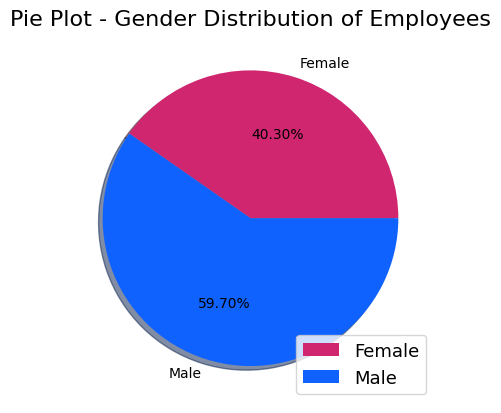

In [12]:
df_gen.plot(kind='pie', y='Gender', colors=['#d02670','#0f62fe'], autopct='%1.2f%%', shadow=True)
plt.title('Pie Plot - Gender Distribution of Employees', fontsize='16')
plt.legend(loc=4, fontsize=13)
plt.ylabel('')
plt.show()

### Distribution of educational qualifications

In [13]:
print('Qualification levels:',df['Education'].unique())

Qualification levels: ['Bachelors' 'Masters' 'PHD']


In [14]:
df_ed=df.groupby('Education')['Education'].count()
df_ed.head()

Education
Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

Text(0.5, 1.0, 'Bar Plot - Distribution of Educational Qualifications')

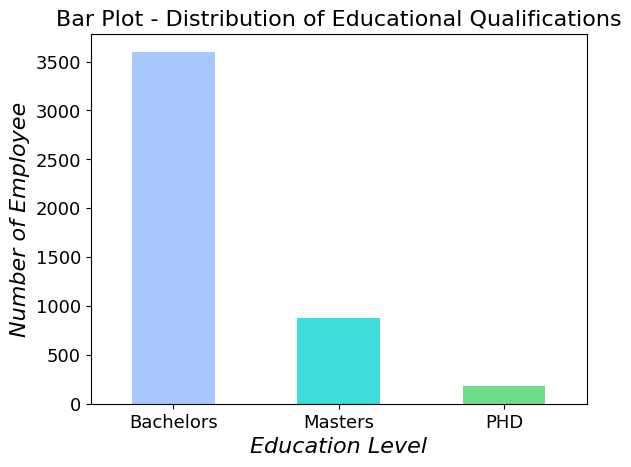

In [15]:
df_ed.plot(kind='bar', x='Education', color=['#a6c8ff','#3ddbd9','#6fdc8c'])
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Education Level',fontsize='16', style='italic')
plt.ylabel('Number of Employee', fontsize='16', style='italic')
plt.title('Bar Plot - Distribution of Educational Qualifications', fontsize='16')

### Distribution of educational qualifications by gender

In [16]:
df_ed_gender=df.groupby(['Education','Gender'])[['Gender']].count()
df_ed_gender.rename(columns={'Gender':'Count'}, inplace=True)
df_ed_gender.head(10)

Count
Education Gender       
Bachelors Female   1435
          Male     2166
Masters   Female    371
          Male      502
PHD       Female     69
          Male      110

In [17]:
df_ed_gender.reset_index(inplace=True)

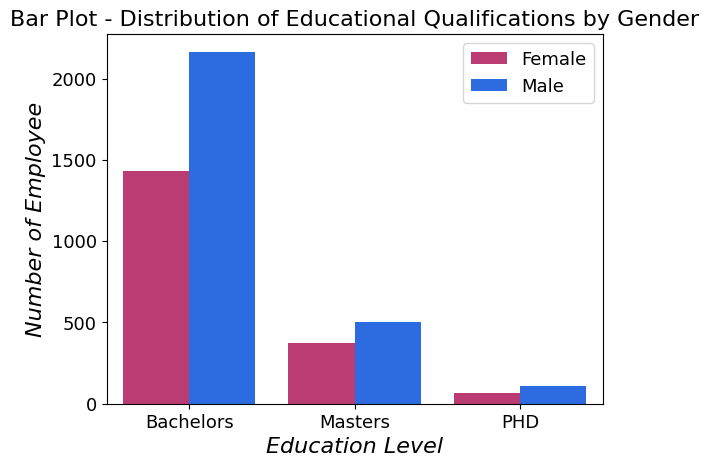

In [18]:
palette = {'Female':'#d02670','Male':'#0f62fe'}
sns.barplot(data=df_ed_gender, x='Education', y='Count', hue='Gender', palette=palette)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.xlabel('Education Level',fontsize='16', style='italic')
plt.ylabel('Number of Employee', fontsize='16', style='italic')
plt.title('Bar Plot - Distribution of Educational Qualifications by Gender', fontsize='16')
plt.show()

### Distribution of recruitment over the years

In [19]:
df_join = df.groupby(['JoiningYear'])[['JoiningYear']].count()
df_join.rename(columns={'JoiningYear':'Count'}, inplace=True)
df_join.reset_index(inplace=True)
df_join.head(6)

,JoiningYear,Count
0,2012,504
1,2013,669
2,2014,699
3,2015,781
4,2016,525
5,2017,1108


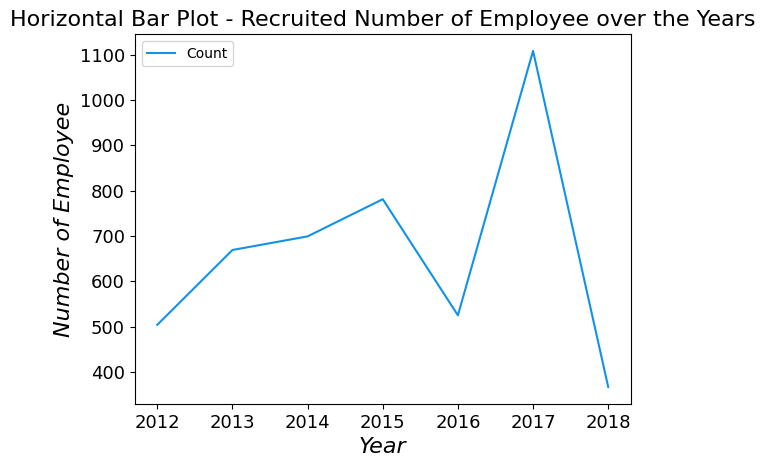

In [20]:
df_join.plot(kind='line', x='JoiningYear', y='Count', color=['#1192e8'])
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year',fontsize='16', style='italic')
plt.ylabel('Number of Employee', fontsize='16', style='italic')
plt.title('Horizontal Bar Plot - Recruited Number of Employee over the Years', fontsize='16')
plt.show()

### Correlation between experience in current domain and payment tier

In [21]:
df[['ExperienceInCurrentDomain', 'PaymentTier']].corr(method='pearson')

,ExperienceInCurrentDomain,PaymentTier
ExperienceInCurrentDomain,1.000000,0.018314
PaymentTier,0.018314,1.000000


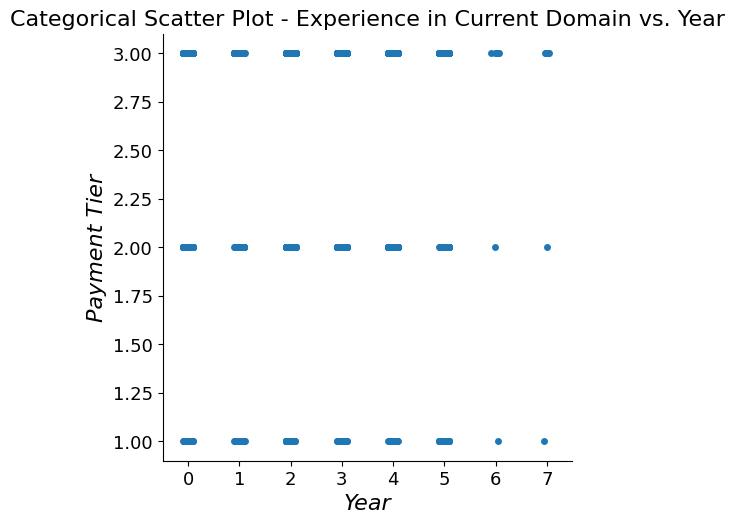

In [22]:
sns.catplot(data=df[['ExperienceInCurrentDomain', 'PaymentTier']], x='ExperienceInCurrentDomain', y='PaymentTier')
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year',fontsize='16', style='italic')
plt.ylabel('Payment Tier', fontsize='16', style='italic')
plt.title('Categorical Scatter Plot - Experience in Current Domain vs. Year', fontsize='16')
plt.show()

### The tendency of employees  to take leave 

In [23]:
df.corr()['LeaveOrNot']

ValueError: could not convert string to float: 'Bachelors'

In [ ]:
df.columns

In [ ]:
df_lE=df.groupby(['Education','LeaveOrNot'])[['Education']].count()
df_lE.rename(columns={'Education':'Count'}, inplace=True)
df_lE.reset_index(inplace=True)
df_lE

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(10, 7))
ax[0].pie(df_lE.iloc[0:2,2], labels=['Not leave', 'Leave'] ,colors=['#fff0f7','#defbe6'], autopct='%1.2f%%', shadow=True)
ax[0].set_title('Tendency of BSc to take leave (1)', fontsize='10')

ax[1].pie(df_lE.iloc[2:4,2], labels=['Not leave', 'Leave'] ,colors=['#fff0f7','#defbe6'], autopct='%1.2f%%', shadow=True)
ax[1].set_title('Tendency of MSc to take leave (1)', fontsize='10')

ax[2].pie(df_lE.iloc[4:6,2], labels=['Not leave', 'Leave'] ,colors=['#fff0f7','#defbe6'], autopct='%1.2f%%', shadow=True)
ax[2].set_title('Tendency of PhD to take leave (1)', fontsize='10')

plt.show()

In [ ]:
df_lCity=df.groupby(['City','LeaveOrNot'])[['City']].count()
df_lCity.rename(columns={'City':'Count'}, inplace=True)
df_lCity.reset_index(inplace=True)
df_lCity

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(10, 15))
ax[0].pie(df_lCity.iloc[0:2,2], labels=['Not leave', 'Leave'] ,colors=['#d9fbfb','#f6f2ff'], autopct='%1.2f%%', shadow=True)
ax[0].set_title('Employees in Bangalore ', fontsize='10')

ax[1].pie(df_lCity.iloc[2:4,2], labels=['Not leave', 'Leave'] ,colors=['#d9fbfb','#f6f2ff'], autopct='%1.2f%%', shadow=True)
ax[1].set_title('Employees in New Delhi', fontsize='10')

ax[2].pie(df_lCity.iloc[4:6,2], labels=['Not leave', 'Leave'] ,colors=['#d9fbfb','#f6f2ff'], autopct='%1.2f%%', shadow=True)
ax[2].set_title('Employees in Pune', fontsize='10')

plt.show()



In [ ]:
df_lGender=df.groupby(['Gender','LeaveOrNot'])[['Gender']].count()
df_lGender.rename(columns={'Gender':'Count'}, inplace=True)
df_lGender.reset_index(inplace=True)
df_lGender

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10, 7))
ax[0].pie(df_lGender.iloc[0:2,2], labels=['Not leave', 'Leave'] ,colors=['#82cfff','#6fdc8c'], autopct='%1.2f%%', shadow=True)
ax[0].set_title('Female Employees', fontsize='10')

ax[1].pie(df_lGender.iloc[2:4,2], labels=['Not leave', 'Leave'] ,colors=['#82cfff','#6fdc8c'], autopct='%1.2f%%', shadow=True)
ax[1].set_title('Male Employees', fontsize='10')


plt.show()



In [ ]:
df_lEB=df.groupby(['EverBenched','LeaveOrNot'])[['EverBenched']].count()
df_lEB.rename(columns={'EverBenched':'Count'}, inplace=True)
df_lEB.reset_index(inplace=True)
df_lEB

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10, 7))
ax[0].pie(df_lEB.iloc[0:2,2], labels=['Not leave', 'Leave'] ,colors=['#82cfff','#6fdc8c'], autopct='%1.2f%%', shadow=True)
ax[0].set_title('No Benched Employees', fontsize='10')

ax[1].pie(df_lEB.iloc[2:4,2], labels=['Not leave', 'Leave'] ,colors=['#82cfff','#6fdc8c'], autopct='%1.2f%%', shadow=True)
ax[1].set_title('Benched Employees', fontsize='10')


plt.show()




In [ ]:
df_lEB.iloc[0:2,:].plot(kind='pie',y='Count',colors=['#d9fbfb','#defbe6'], autopct='%1.2f%%', shadow=True, labels=['Not leave', 'Leave'])
plt.title('No Benched Employee to take leave (1)')
plt.legend(['Not leave', 'Leave'])
plt.ylabel('% Dist.')
plt.show()

In [ ]:
df_lEB.iloc[2:4,:].plot(kind='pie',y='Count',colors=['#d9fbfb','#defbe6'], autopct='%1.2f%%', shadow=True, labels=['Not leave', 'Leave'])
plt.title('Benched Employee to take leave (1)')
plt.legend(['Not leave', 'Leave'])
plt.ylabel('% Dist.')
plt.show()

## Results and discussion

The employee dataset was retrieved from This data is retrieved from https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset under the license of CC9: Public Domain with usability of 9.41. The dataset consists of 4653 rows and 9 columns without any missing entries. As no unique identifiers in the dataset indicate duplicated entries, duplicates were not spotted. 

In the company, 59.70% of employees are male, whereas female employees account for 40.30% of the company. Hence, male employees are prevalent in the company.

The educational qualification distribution shows that 3601 employees hold a BSc degree, whereas 873 and 179 employees have MSc and PhD degrees, respectively. Thus, the majority of employees have a BSc degree alone.

The most of the employees, a total of 1108, were recruited in 2017. 

The Pearson's correlation coefficient between experience in the current domain and payment tier, 0.018, shows the lack of correlation between the experience and payment. 

Regarding the tendency of employees to take leave, there is no strong positive/negative correlation between leave-taking behavior and joining year (0.18)/payment tier (-0.20)/age (-0.05)/experience in domain (-0.03). In addition, employees with Ph.D. degrees (25.14% of PhDs) are less prone to take leave in comparison to those with MSc (48.80% of MSc) and BSc degrees (25.14% of BSc). Moreover, employees in Bangalore (26.71% of employees in Bangalore) are less likely to take leave in comparison to ones in New Delhi (31.63% of employees therein) and Pune (50.39% of employees therein). 25.77% of males display leave-taking behavior, whereas 47.15% of females take leave. Last but not least, 33.13% of employees with any temporary tasks display leave-taking behavior, whilst 45.40% of employees without any temporary tasks prefer to leave-taking behavior.

## Summary

Herein, it is aimed to address 

* the gender distribution

* the distribution of educational qualifications among employees

* the distribution of educational qualifications among employees by gender

* the number of recruited employees over the years

* the correlation between payment tier and experience in the current domain

* patterns in leave-taking behavior among employees.

The analysis of the dataset shows that the majority of employees are male. In the company, employees with a BSc degree alone are more prevalent. The majority of the current employees were recruited in 2017. No correlation between experience in the current domain and payment tier is detected in the company. 

Leave-taking behavior are not strongly correlated with joining year, payment tier, age, and experience in domain. However, PhDs in the company are less likely to take leave than MSc and BSc. Employees in Bangalore are the least likely to take leave compared to New Delhi and Pune. The comparison of male employees taking leave with female employees uncovers male employees display less take leave behavior. The assigned temporary task ends up with less take leave behavior.